In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from FH_Functions import ent, dst, J, opt_fracs
from FH_Functions import opt_fracs_rho, N_o_f, min_time
from FH_Functions import search_data

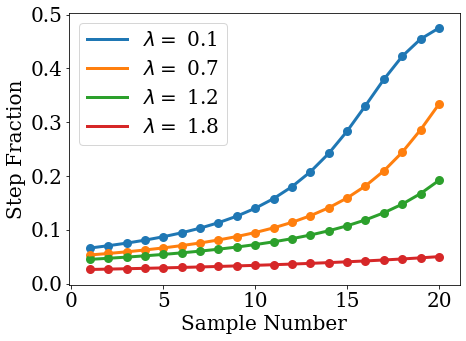

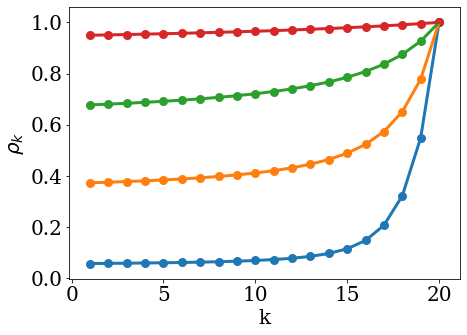

In [3]:
nLams = 4
lams = np.linspace(0.1, 1.8, nLams)

N = 20
Ns = np.arange(1,N+1)

fig1 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = fig1.add_subplot(111)

fig2 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a2 = fig2.add_subplot(111)

for lam in lams:
    policy, rhos = opt_fracs_rho(N,lam)  

    a1.plot(Ns,policy,label=r'$\lambda = $ %.1f'%lam,linewidth=3)
    a1.scatter(Ns,policy,linewidths=3)
    
    a2.plot(Ns,rhos,label=r'$\lambda = $ %.1f'%lam,linewidth=3)
    a2.scatter(Ns,rhos,linewidths=3)
    
a1.legend(loc='upper left',prop={'size': 20})
a1.set_ylabel('Step Fraction',fontsize=20)
a1.set_xlabel('Sample Number',fontsize=20)

a2.set_ylabel(r'$\rho_k$',fontsize=20)
a2.set_xlabel('k',fontsize=20);

# fig1.tight_layout()
# fig1.savefig('OptSamples.eps',bbox_inches='tight')

# fig2.tight_layout()
# fig2.savefig('Rho.eps',bbox_inches='tight')

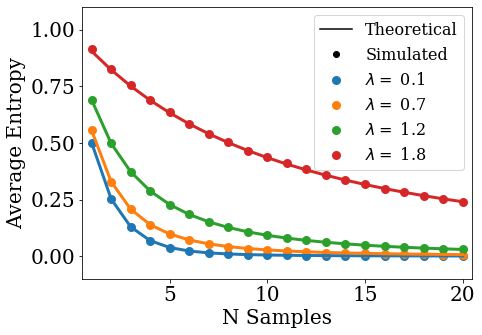

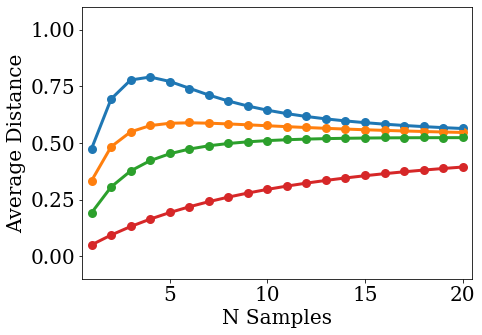

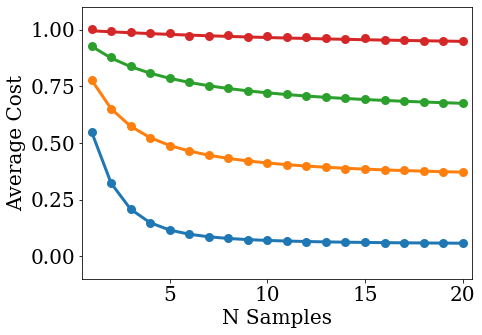

In [4]:
# theoretical vs. simulated
nThts = 99
thts = np.linspace(0.01, 0.99, nThts)
nLams = 4
lams = np.linspace(0.1, 1.8, nLams)
maxNs = 20
Ns = np.arange(1,maxNs+1)

Ent_avg = np.zeros((nLams,maxNs))
Dst_avg = np.zeros((nLams,maxNs))

Ent = np.zeros((nLams,maxNs))
Dst = np.zeros((nLams,maxNs))

fig1 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)

fig2 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)


fig3 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)

ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()

for ii, lam in enumerate(lams):
    for jj, N in enumerate(Ns):
        x = opt_fracs(N,lam)
        Ent[ii,jj] = ent(x)
        Dst[ii,jj] = dst(x)
        for tht in thts:
            ls = search_data()
            ls.sim_uni_search(lam, tht, x)
            Ent_avg[ii,jj] += ls.intervals[-1]
            Dst_avg[ii,jj] += ls.tot_dist
    ent_avg = Ent_avg[ii,:]/(nThts)
    dst_avg = Dst_avg[ii,:]/(nThts)

    ax1.scatter(Ns,ent_avg,label=r'$\lambda = $ %.1f'%lam, linewidths=3)
    ax1.plot(Ns,Ent[ii,:], linewidth=3)
    ax2.plot(Ns,Dst[ii,:], linewidth=3)
    ax2.scatter(Ns,dst_avg, linewidths=3)
    ax3.plot(Ns,lam*Dst[ii,:] + Ent[ii,:], linewidth=3)
    ax3.scatter(Ns,lam*dst_avg + ent_avg, linewidths=3)

ax1.set_ylabel('Average Entropy',fontsize=20)
ax1.set_xlabel('N Samples',fontsize=20)
ax1.plot(0,0,'k',label='Theoretical')
ax1.plot(0,0,'ko',label='Simulated')
ax1.set_xlim([0.5,maxNs+0.5])
ax1.set_ylim([-0.1,1.1])
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ax2.set_ylabel('Average Distance',fontsize=20)
ax2.set_xlabel('N Samples',fontsize=20)
ax2.set_xlim([0.5,maxNs+0.5])
ax2.set_ylim([-0.1,1.1])
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20);

ax3.set_ylabel('Average Cost',fontsize=20)
ax3.set_xlabel('N Samples',fontsize=20)
ax3.set_xlim([0.5,maxNs+0.5])
ax3.set_ylim([-0.1,1.1])
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20);

ax1.legend(loc='upper right',prop={'size': 16}, ncol=1);

# fig1.tight_layout()
# fig2.tight_layout()
# fig3.tight_layout()

# fig1.savefig('Entropy_comp.eps',bbox_inches='tight');
# fig2.savefig('Distance_comp.eps',bbox_inches='tight');
# fig3.savefig('Cost_comp.eps',bbox_inches='tight');

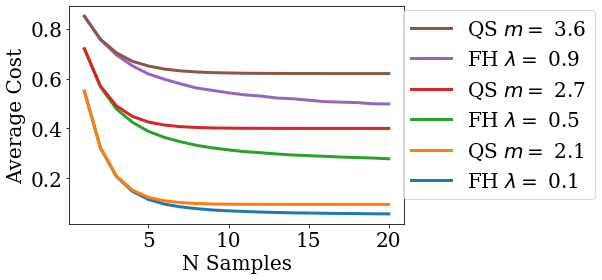

In [5]:
"""Plots for the cost of QS vs FH given out initial cost function"""
nThts = 99
thts = np.linspace(0.01, 0.99, nThts)
nLams = 3
lams = np.linspace(0.1, 0.9, nLams)
lams

maxNs = 21
Ns = np.arange(1,maxNs)

L_Cst_avg = np.zeros((nLams,maxNs-1))
G_Cst_avg = np.zeros((nLams,maxNs-1))

fig1 = plt.figure(figsize=(6,4))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = plt.subplot(111)

for ii, lam in enumerate(lams):
    for jj, N in enumerate(Ns):
        x = opt_fracs(N,lam)
        g = x[-1]*np.ones(N)
        for tht in thts:
            ls = search_data()
            ls.sim_uni_search(lam, tht, x)
            L_Cst_avg[ii,jj] += ls.cost
            
            gs = search_data()
            gs.sim_uni_search(lam, tht, g)
            G_Cst_avg[ii,jj] += gs.cost
            
    L_cst_avg = L_Cst_avg[ii,:]/(nThts)
    G_cst_avg = G_Cst_avg[ii,:]/(nThts)

    a1.plot(Ns,L_cst_avg,label=r'FH $\lambda = $ %.1f'%lam, linewidth=3)
    a1.plot(Ns,G_cst_avg,label=r'QS $m = $ %.1f'%(1/(1/2 -lam/4)), linewidth=3)
    
handles, labels = a1.get_legend_handles_labels()
a1.legend(reversed(handles), reversed(labels),loc='upper right', bbox_to_anchor=(1.6, 1.03), prop={'size': 20});

a1.set_ylabel('Average Cost',fontsize=20)
a1.set_xlabel('N Samples',fontsize=20);

# fig1.savefig('samplef3.eps',bbox_inches='tight')

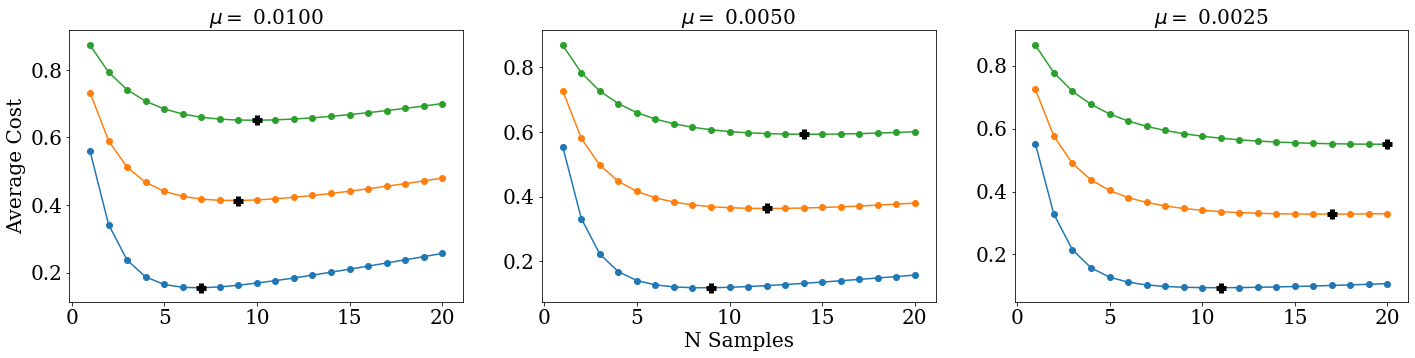

In [6]:
"""Plots to show how to find best strategy if we penalize number of samples."""
mus = [0.01, 0.005, 0.0025]

fig = plt.figure(figsize=(24,5))

Cst = np.zeros((nLams,maxNs-1))
Cst_avg = np.zeros((nLams,maxNs-1))
for hh, mu in enumerate(mus):
    ax = fig.add_subplot(1,3,hh+1)
    ax.set_title(r'$\mu = $ %.4f'%mu, fontsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    for ii, lam in enumerate(lams):
        for jj, N in enumerate(Ns):
            Cst[ii,jj] = Ent[ii,jj] + lam*Dst[ii,jj]
        cst = Cst[ii,:] + mu*Ns
        ax.plot(Ns,cst, label=r'$\lambda = $ %.1f'%lam)
        ax.scatter(Ns,cst)
        min_ind = np.argmin(cst)
        ax.plot(min_ind+1,cst[min_ind],'+k',markersize=10,markeredgewidth=5)
    if not hh:
        ax.set_ylabel('Average Cost',fontsize=20)
#         ax.legend(loc='upper left',prop={'size': 20} ncol=4, bbox_to_anchor=(0,1.2))
    if not (hh - 1):
        ax.set_xlabel('N Samples',fontsize=20)
#     print(np.amin(Cst[]))
# ax1.set_ylabel('Cost',fontsize=20)
# ax1.set_xlabel('N Samples',fontsize=20)
# ax1.set_xlim([0.7,maxNs-0.7])
# ax1.xaxis.set_tick_params(labelsize=20)
# ax1.yaxis.set_tick_params(labelsize=20)
# fig.savefig('N_cost_comparison.eps',bbox_inches='tight')